Correlación de Spearman

In [4]:
import pandas as pd
from scipy import stats

In [5]:
def read_csv_to_dataframe(file_path):
    try:
        df = pd.read_csv(file_path, sep=';')
        return df
    except Exception as e:
        print(f"Error reading the cvs file: {e}")
        return None

In [6]:
terminos_df= read_csv_to_dataframe("Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [4]:
def test_spearman(x, y, alpha=0.05):
    if len(x) != len(y):
        raise ValueError("Las variables deben tener la misma longitud.")

    rho, pval = stats.spearmanr(x, y)

    print(f"Spearman's correlation coefficient (rho): {rho:.3f}")
    print(f"p-value: {pval:.4f}")

    if pval < alpha:
        print(f"✔️ Significant relationship (p < {alpha:.3f})")
    else:
        print(f"⚠️ No significant relationship (p ≥ {alpha:.3f})")

    if rho > 0:
        print("📈 Positive correlation")
    else:
        print("📉 Negative correlation")

In [5]:
test_spearman(terminos_df["ta_micromol_kg"], terminos_df["dic_micromol_kg"])

Spearman's correlation coefficient (rho): 0.838
p-value: 0.0000
✔️ Significant relationship (p < 0.050)
📈 Positive correlation


> Matriz de correlación

In [6]:
ta_sal_dic_df = terminos_df[['sal_psu', 'ta_micromol_kg', 'dic_micromol_kg']]

In [7]:
corr_matrix = ta_sal_dic_df.corr(method='spearman')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



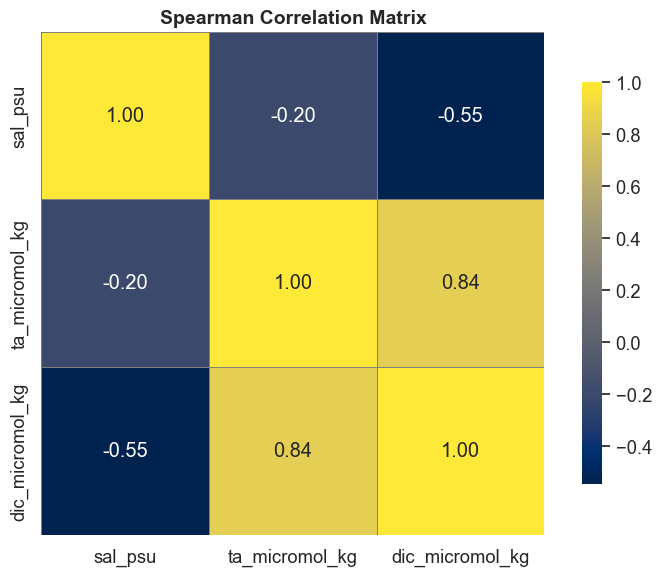

In [9]:
# Plot the heatmap 
plt.figure(figsize=(8, 6))
sns.set(style="white", font_scale=1.2)
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='cividis', 
            square=True, 
            linewidths=0.5, 
            linecolor='gray',
            cbar_kws={'shrink': 0.8})

plt.title('Spearman Correlation Matrix', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

>> Tarea 13 Crear una función para la correlación de Pearson

In [1]:
from scipy.stats import pearsonr

In [7]:
def pearson_correlations(df, variables):
    resultados = {}
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            var1, var2 = variables[i], variables[j]
            # Eliminamos NaN para evitar errores
            datos = df[[var1, var2]].dropna()
            r, p = pearsonr(datos[var1], datos[var2])
            resultados[f"{var1} vs {var2}"] = {"r": r, "p-value": p}
    return pd.DataFrame(resultados).T



In [8]:
# Variables de interés
variables = ['sal_psu', 'ta_micromol_kg', 'dic_micromol_kg']

# Llamamos a la función
resultados = pearson_correlations(terminos_df, variables)

print(resultados)

                                          r       p-value
sal_psu vs ta_micromol_kg         -0.278799  3.803775e-03
sal_psu vs dic_micromol_kg        -0.571931  1.514410e-10
ta_micromol_kg vs dic_micromol_kg  0.882284  8.179417e-36


>> Matriz de correlación de pearson

In [9]:
variables = ['sal_psu', 'ta_micromol_kg', 'dic_micromol_kg']
corr = terminos_df[variables].corr(method='pearson')




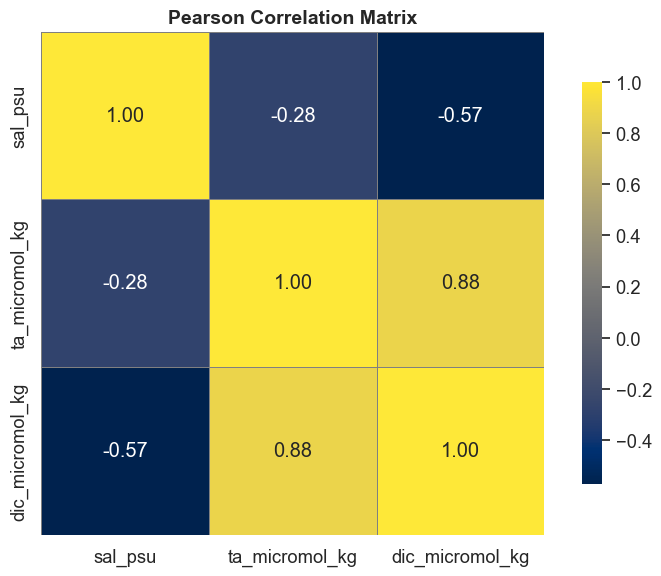

In [15]:
plt.figure(figsize=(8, 6))
sns.set(style="white", font_scale=1.2)
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='cividis', 
            square=True, 
            linewidths=0.5, 
            linecolor='gray',
            cbar_kws={'shrink': 0.8})

plt.title('Pearson Correlation Matrix', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()